# Algoritmo de Kruskal

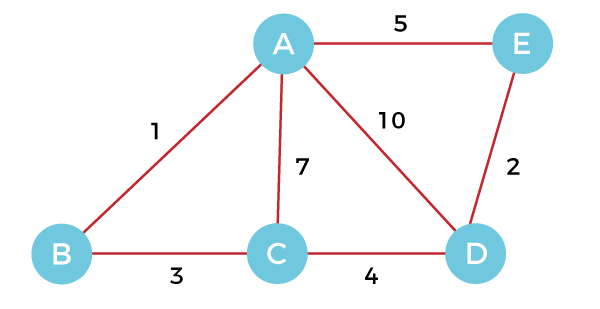


Primero creamos la lista de adyacencia. En este caso la crearemos sin recurrir a una clase, lo haremos por facilidad de explicar.


In [2]:
listaAdj = {
    "A": [("B", 1), ("C", 7), ("D", 10), ("E", 5)],
    "B": [("A", 1), ("C", 3)],
    "C": [("A", 7), ("B", 3), ("D", 4)],
    "D": [("A", 10), ("C", 4), ("E", 2)],
    "E": [("A", 5), ("D", 2)]
}

In [3]:
from queue import PriorityQueue
from collections import defaultdict 

def procesar(vertice, conectados, listaAdj, cp):
    # Se considera el vértice como conectado
    conectados.add(vertice)
    cant_adyacentes = len(listaAdj[vertice])
    # Pasamos por los adyacentes al vértice
    for j in range(cant_adyacentes):
        # se almacena en adyacente el nombre del vértice
        adyacente = listaAdj[vertice][j][0]
        #se almacena en peso el costo de ir de 'vertice' a 'adyacente'
        peso = listaAdj[vertice][j][1]
        # Si el adyacente no ha sido conectado
        if adyacente not in conectados:
            # Agregamos el lado a la cola de prioridad
            lado = (peso, (vertice, adyacente))
            cp.put(lado)
            


def prim(listaAdj, primer_vertice):
    numVertices = len(listaAdj)
    # Cola de prioridad para los lados que deben ser revisados
    cp = PriorityQueue()
    # Conjunto de vértices conectados, hasta ahora es vacío
    conectados = set()
    # Creación del spanning tree como lista de incidencia.
    st = []
    # Se procesa el primer vértice, puede ser cualquiera
    procesar(primer_vertice, conectados, listaAdj, cp)
    # En conectados se tiene actualizado el primer nodo, 
    # en cp se encuentran los adyacentes al primer vértice
    # ordenados por peso 
    while not cp.empty():
        lado = cp.get() # Desencolamos el lado de menor peso
        vertice = lado[1][1] #Identificamos que vértice es
        # Si el vértice ya está en conectados, quiere decir
        # que no podemos agregar este lado porque genera ciclo
        if vertice not in conectados:
            # Si el vértice no está en conectados, entonces 
            # se agrega el lado al spanning tree.
            st.append(lado)
            # Se procesa el vértice encontrando todos los adyacentes
            # y agregandolos a la cola de prioridad.
            procesar(vertice, conectados, listaAdj, cp)
    return st


In [4]:
c = prim(listaAdj, "A")
print(c)

[(1, ('A', 'B')), (3, ('B', 'C')), (4, ('C', 'D')), (2, ('D', 'E'))]
